# Проверка гипотез

Продуктовые метрики

**Стандартизация (Z-преобразование)** – преобразование, которое позволяет любую шкалу перевести в стандартную Z-шкалу (Z-scores), где среднее значение будет равно нулю, а стандартное отклонение – равняться 1

    from scipy.stats import zscore
    zscore(df.A)

**Стандартная ошибка среднего (SE)** показывает, насколько выборочное среднее отличается от среднего генеральной совокупности. 
SE при увеличении размера выборки будет стремиться к нулю.

    import pandas as pd
    df.A.sem()
    
    from scipy import stats
    stats.sem(df.A)

В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

Описание данных:
* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [2]:
conversion = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/statistics/conversion.csv')

In [3]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

In [4]:
conversion.shape

(1143, 11)

In [5]:
conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [6]:
conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [7]:
conversion.xyz_campaign_id.nunique()

3

Посмотрите на данные и соотнесите переменные с их типом

- Approved_conversion, Total_conversion, Impressions и Clicks - дискретные
- Spent - непрерывная
- age - ранговая
- gender и interest - номинативные

Постройте график распределения числа показов (Impressions) для каждой рекламной кампании в Facebook, прологарифмировав значения. 


In [8]:
np.log(conversion.groupby('fb_campaign_id', as_index = False).agg({'Impressions' : 'sum'}))

,fb_campaign_id,Impressions
0,11.551338,8.902456
1,11.551348,9.790375
2,11.551377,6.541030
3,11.551454,9.035034
4,11.551463,7.557473
...,...,...
686,12.100584,13.937527
687,12.100590,13.365386
688,12.100595,11.928546
689,12.100607,13.580108


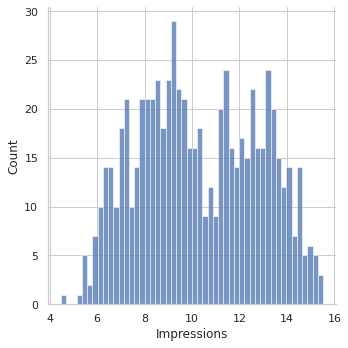

In [9]:
sns.displot(np.log(conversion.groupby('fb_campaign_id', as_index = False).agg({'Impressions' : 'sum'})).Impressions, bins = 50)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

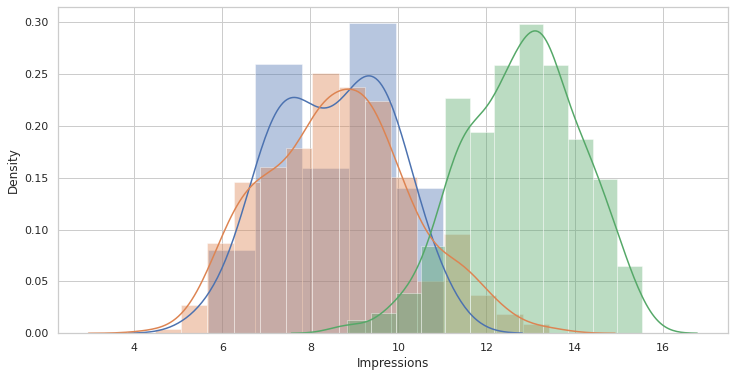

In [10]:
sns.distplot(np.log(conversion.query("xyz_campaign_id == 916").groupby('fb_campaign_id').Impressions.sum()))
sns.distplot(np.log(conversion.query("xyz_campaign_id == 936").groupby('fb_campaign_id').Impressions.sum()))
sns.distplot(np.log(conversion.query("xyz_campaign_id == 1178").groupby('fb_campaign_id').Impressions.sum()))

Выберите верные утверждения:


- Полученное распределение является нормальным
- **Полученное распределение не является нормальным**
- Распределение унимодальное 
- Распределение симметричное
- **Распределение бимодальное**

In [11]:
#немного кластеризации

from sklearn.mixture import GaussianMixture

dat = np.log(conversion.groupby('fb_campaign_id').Impressions.sum()).values.reshape(-1, 1) #готовим данные

mix = GaussianMixture(n_components = 2).fit(dat) #строим модель

labels = mix.predict(dat) #вычисляем принадлежности

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


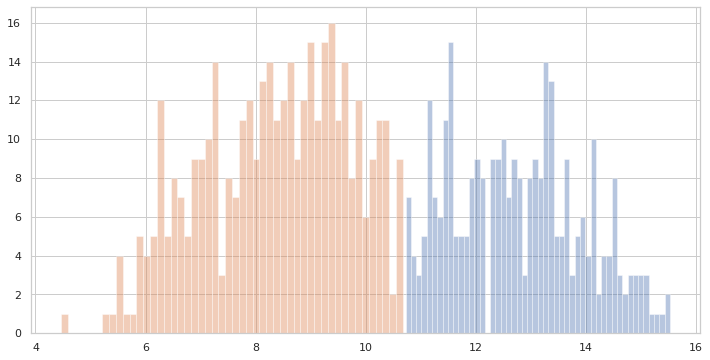

In [12]:
sns.distplot(dat[labels == 0], kde=False, bins=50)
sns.distplot(dat[labels == 1], kde=False, bins=50)

Теперь посчитаем ещё несколько полезных метрик. 

CTR (click-through rate) - показывает кликабельность, т.е. отношение числа кликов к количеству показов.

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [13]:
conversion['CTR'] = conversion.Clicks / conversion.Impressions

In [14]:
conversion.iloc[conversion.CTR.idxmax()].ad_id

738637

In [15]:
conversion.set_index("ad_id").CTR.idxmax()

738637

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). 
Какому графику соответствует распределение CTR кампании 916?

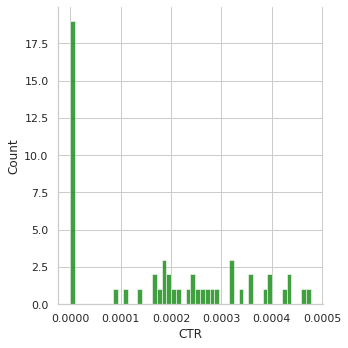

In [16]:
sns.displot(data = conversion.query('xyz_campaign_id == 916'), color = 'green', x = 'CTR', bins = 50)

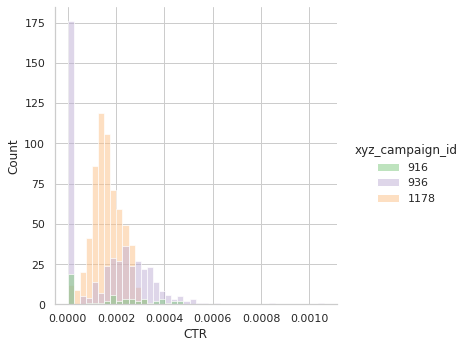

In [17]:
sns.displot(data = conversion, x="CTR", hue = "xyz_campaign_id", palette = "Accent")

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы денег на число кликов

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. 
В ответе укажите межквартильный размах, округленный до двух знаков после точки.



In [18]:
conversion['CPC'] = conversion.Spent / conversion.Clicks

In [19]:
conversion.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [20]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
 11  CTR                  1143 non-null   float64
 12  CPC                  936 non-null    float64
dtypes: float64(3), int64(8), object(2)
memory usage: 116.2+ KB


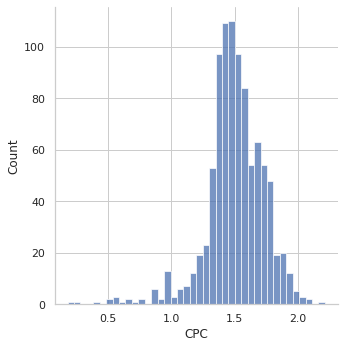

In [21]:
sns.displot(conversion.CPC.dropna())

In [22]:
# Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать

from scipy import stats

stats.iqr(conversion.CPC, nan_policy='omit').round(2)

0.25

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

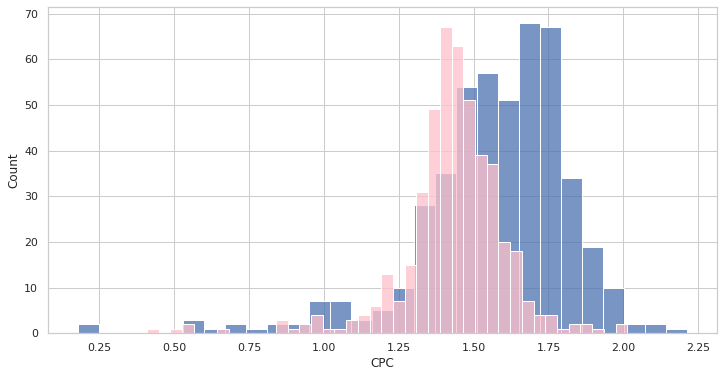

In [23]:
sns.histplot(conversion.query('gender == "M"').CPC.dropna())
sns.histplot(conversion.query('gender == "F"').CPC.dropna(), color = 'pink')

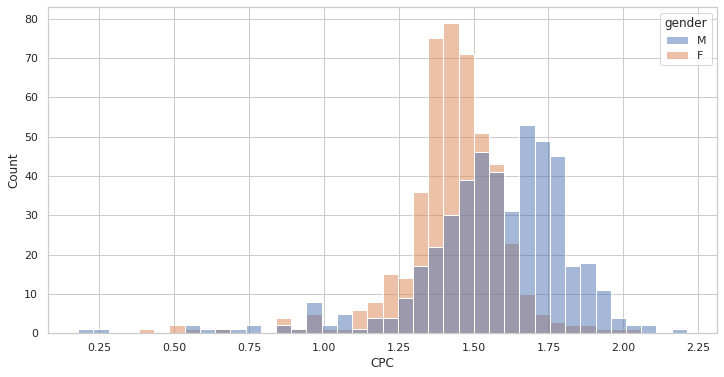

In [24]:
sns.histplot(data=conversion, x="CPC", hue="gender")

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. 
В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. 


In [25]:
conversion['conversion_rate'] = conversion.Approved_Conversion / conversion.Clicks

In [26]:
conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,conversion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


In [27]:
conversion.query('ad_id == 1121814').conversion_rate.mul(100).round(2)

860    3.09
Name: conversion_rate, dtype: float64